In [16]:
# oneD_optimization.py
"""Volume 2: One-Dimensional Optimization.
Nathan Schill
Section 2
Thurs. Feb. 9, 2023
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize as opt

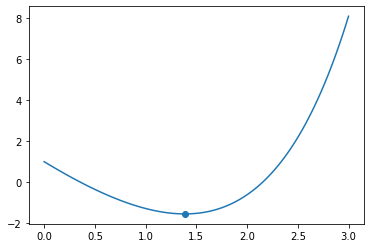

((1.386290222451367, True, 24), 1.3862943731605457)

In [17]:
# Problem 1
def golden_section(f, a, b, tol=1e-5, maxiter=100):
    """Use the golden section search to minimize the unimodal function f.

    Parameters:
        f (function): A unimodal, scalar-valued function on [a,b].
        a (float): Left bound of the domain.
        b (float): Right bound of the domain.
        tol (float): The stopping tolerance.
        maxiter (int): The maximum number of iterations to compute.

    Returns:
        (float): The approximate minimizer of f.
        (bool): Whether or not the algorithm converged.
        (int): The number of iterations computed.
    """

    ### Algorithm 16.1 as given in the lab PDF
    x0 = (a+b)/2
    phi = (1+5**(1/2))/2

    converged = False

    for i in range(maxiter):
        c = (b-a)/phi
        at = b-c
        bt = a+c

        if f(at) <= f(bt):
            b = bt
        else:
            a = at
        
        x1 = (a+b)/2
        if abs(x0 - x1) < tol:
            converged = True
            break
        x0 = x1
    
    return x1, converged, i+1

f = lambda t: np.exp(t) - 4*t
a, b = 0, 3

minimizer = golden_section(f, a, b)
sp_minimizer = opt.golden(f, brack=(a, b))

x = np.linspace(0, 3, 100)
plt.plot(x, f(x))
plt.scatter(minimizer[0], f(minimizer[0]))
plt.show()
minimizer, sp_minimizer

In [19]:
# Problem 2
def newton1d(df, d2f, x0, tol=1e-5, maxiter=100):
    """Use Newton's method to minimize a function f:R->R.

    Parameters:
        df (function): The first derivative of f.
        d2f (function): The second derivative of f.
        x0 (float): An initial guess for the minimizer of f.
        tol (float): The stopping tolerance.
        maxiter (int): The maximum number of iterations to compute.

    Returns:
        (float): The approximate minimizer of f.
        (bool): Whether or not the algorithm converged.
        (int): The number of iterations computed.
    """

    # Assume failure to converge unless tolerance is reached
    converged = False

    # Iterate at most N times
    for k in range(maxiter):
        
        # Compute the next iteration
        x1 = x0 - df(x0)/d2f(x0)
        
        # Check for convergence
        if np.abs(x1 - x0) < tol:
            # Upon convergence, stop iterating
            converged = True
            break

        # Otherwise, update the guess for the next iteration
        x0 = x1
    
    return x1, converged, k+1

f = lambda x: x**2 + np.sin(5*x)
df = lambda x : 2*x + 5*np.cos(5*x)
d2f = lambda x : 2 - 25*np.sin(5*x)
x0 = 0

newton1d(df, d2f, x0), opt.newton(df, x0=0, fprime=d2f, tol=1e-10, maxiter=500)

((-1.4473142236328096, True, 48), -1.4473142236328096)

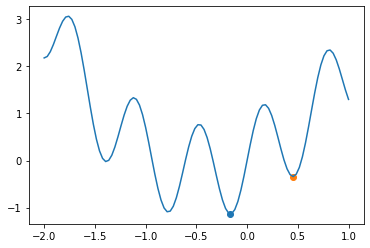

((-0.16367721846481662, True, 8), 0.45308663951300454)

In [36]:
# Problem 3
def secant1d(df, x0, x1, tol=1e-5, maxiter=100):
    """Use the secant method to minimize a function f:R->R.

    Parameters:
        df (function): The first derivative of f.
        x0 (float): An initial guess for the minimizer of f.
        x1 (float): Another guess for the minimizer of f.
        tol (float): The stopping tolerance.
        maxiter (int): The maximum number of iterations to compute.

    Returns:
        (float): The approximate minimizer of f.
        (bool): Whether or not the algorithm converged.
        (int): The number of iterations computed.
    """
    
    # Assume failure to converge unless tolerance is reached
    converged = False

    # Compute first instances of df(x_{k-1}), df(x_k)
    dfx0 = df(x0)
    dfx1 = df(x1)

    # Iterate at most N times
    for k in range(maxiter):     
        # Compute the next iteration
        x2 = (x0*dfx1 - x1*dfx0) / (dfx1 - dfx0)
        
        # Check for convergence
        if np.abs(x2 - x1) < tol:
            # Upon convergence, stop iterating
            converged = True
            break

        # Otherwise, update the xk and df(xk) for the next iteration
        x0 = x1
        x1 = x2
        dfx0 = dfx1
        dfx1 = df(x2)
    
    return x2, converged, k+1

f = lambda x: x**2 + np.sin(x) + np.sin(10*x)
df = lambda x: 2*x + np.cos(x) + 10*np.cos(10*x)
x0, x1 = 0, -1

minimizer = secant1d(df, x0, x1)
newton_minimizer = opt.newton(df, x0=0, tol=1e-10, maxiter=500)

x = np.linspace(-2, 1, 100)
plt.plot(x, f(x))
plt.scatter(minimizer[0], f(minimizer[0]))
plt.scatter(newton_minimizer, f(newton_minimizer))
plt.show()
minimizer, newton_minimizer

In [45]:
# Problem 4
def backtracking(f, Df, x, p, alpha=1, rho=.9, c=1e-4):
    """Implement the backtracking line search to find a step size that
    satisfies the Armijo condition.

    Parameters:
        f (function): A function f:R^n->R.
        Df (function): The first derivative (gradient) of f.
        x (float): The current approximation to the minimizer.
        p (float): The current search direction.
        alpha (float): A large initial step length.
        rho (float): Parameter in (0, 1).
        c (float): Parameter in (0, 1).

    Returns:
        alpha (float): Optimal step size.
    """
    
    ### Use Algorithm 16.2 as given in the lab PDF
    Dfp = Df(x)@p
    fx = f(x)

    while f(x + alpha*p) > fx + c*alpha*Dfp:
        alpha = rho*alpha
    
    return alpha

f = lambda x: x[0]**2 + x[1]**2 + x[2]**2
Df = lambda x: np.array([2*x[0], 2*x[1], 2*x[2]])

# Current minimizer guess
x = np.array([150., .03, 40.])
p = np.array([-.5, -100., -4.5])

backtracking(f, Df, x, p)

0.04710128697246249